# Developing a dashboard on the MSIS program at Santa Clara University for prospective students and recruiters


Importing the important Libraries 

In [63]:
import pandas as pd 
import numpy as np
import requests 
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
pd.set_option('max_rows', 300)

import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns
import pandas_datareader as pdr
from pandas_datareader.data import Options
import datetime as dt
import requests
import json
import urllib

In [64]:
from bs4 import BeautifulSoup

Fetching  the data from SCU website to show case the current Class profile 

In [65]:
url = 'https://www.scu.edu/business/ms-information-systems/prospective-students/class-profile/'

In [66]:
r = requests.get(url)
r.content

b'<!DOCTYPE html>\r\n<html lang="en">\r\n  <head>\r\n    <meta charset="utf-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1">\r\n    <title>Class Profile - Leavey School of Business - Santa Clara University</title>\r\n    <meta name="description" content="">\r\n\t  <meta name="keywords" content="">\r\n\t  <meta name="author" content="Santa Clara University">\r\n\t  <meta name="generator" content="T4 Site Specific">\r\n\r\n    \r\n    \r\n    <link rel="apple-touch-icon" sizes="57x57" href="/assets/images/favicons/apple-touch-icon-57x57.png">\r\n    <link rel="apple-touch-icon" sizes="60x60" href="/assets/images/favicons/apple-touch-icon-60x60.png">\r\n    <link rel="apple-touch-icon" sizes="72x72" href="/assets/images/favicons/apple-touch-icon-72x72.png">\r\n    <link rel="apple-touch-icon" sizes="76x76" href="/assets/images/favicons/apple-touch-icon-76x76.png">\r\n    <link rel="apple-touch-icon

In [67]:
soup = BeautifulSoup(r.content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Class Profile - Leavey School of Business - Santa Clara University
  </title>
  <meta content="" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="Santa Clara University" name="author"/>
  <meta content="T4 Site Specific" name="generator"/>
  <link href="/assets/images/favicons/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/assets/images/favicons/apple-touch-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/assets/images/favicons/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/assets/images/favicons/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/assets/images/favicons/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114

In [68]:
for data in soup.find_all("div", {"class" : "one-column news module"}):
    print(data.text)

Class DemographicsWomen : 51%
Average age : 26
Multilingual :  89%
AcademicsAverage undergraduate GPA  3.2
Average GMAT  650
Average GRE  308
% holding graduate degrees  20%
Professional ProfileAverage work experience :  2.3 years
Employed at time of admission : 66%
Selected hiring companies :  Apple, Cisco, Ernst & Young, Facebook, NetApp, NVIDIA, Symantec, Twitter
Where SCU works


Fetching the data2 for showcasing salary, growth rate for MSIS Majors

In [69]:
url1 = 'http://study.com/articles/Salary_and_Job_Information_for_MIS_Majors.html'
r1 = requests.get(url1)
r1.content
soup1 = BeautifulSoup(r1.content, "lxml")
print(soup1.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Salary and Job Information for MIS Majors
  </title>
  <meta content="index,follow,noodp" name="robots"/>
  <meta content="article" property="og:type"/>
  <meta content="http://study.com/images/StudyCom-og-Facebook-Logo.jpg" property="og:image"/>
  <meta content="image/jpg" property="og:image:type"/>
  <meta content="Salary and Job Information for MIS Majors" property="og:title"/>
  <meta content="Students who searched for Salary and Job Information for MIS Majors  found the articles, information, and resources on this page  helpful." property="og:description"/>
  <meta content="http://study.com/articles/Salary_and_Job_Information_for_MIS_Majors.html" property="og:url"/>
  <meta content="Study.com" property="og:site_name"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name

In [70]:
soup1.title

<title>Salary and Job Information for MIS Majors</title>

In [71]:
for data1 in soup1.find_all("td"):
    print(data1.text)

Career Titles 
 Network & Computer Systems Administrators 
 Computer Systems Analysts 
 Computer & Information Systems Managers
Education Requirements 
Bachelor's or master's degree 
 Bachelor's or master's degree 
 Bachelor's or master's degree
Projected Job Growth (2014-2024)*  
 8% 
 21% 
15%
Median Annual Salary (May, 2015)*
 $77,810 
 $85,800 
$131,600


In [72]:
aCareerTitles = []
aProjectedGrowth = []
aMedianSalary = []
Count = 0
for data1 in soup1.find_all("td"):
    Count = Count+1
    if(Count >1 and Count<=4):
        aCareerTitles.append(data1.text)
    elif(Count > 9 and Count <=12):
         aProjectedGrowth.append(data1.text)
    elif(Count >13 and Count <=16):    
         aMedianSalary.append(data1.text)
        
        
print(aCareerTitles)
print(aProjectedGrowth)
print(aMedianSalary)

[' Network & Computer Systems Administrators ', ' Computer Systems Analysts ', ' Computer & Information Systems Managers']
[' 8% ', ' 21% ', '15%']
[' $77,810 ', ' $85,800 ', '$131,600']


Inserting the data in dataframe

In [73]:
data2 =  {'Career Titles':aCareerTitles,'Projected Growth Rate:(2014-2024)':aProjectedGrowth, 'Median Salary':aMedianSalary}
Dataframe=pd.DataFrame(data2)
Dataframe

,Career Titles,Median Salary,Projected Growth Rate:(2014-2024)
0,Network & Computer Systems Administrators,"$77,810",8%
1,Computer Systems Analysts,"$85,800",21%
2,Computer & Information Systems Managers,"$131,600",15%


Fetching the data3 for Comapring different MSIS program in the bay area

In [74]:
Data4 = requests.get('http://study.com/articles/Top_Ranked_School_for_Information_Technology_-_San_Jose_CA.html')
Data4.content

b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>\n        \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Top Ranked School for Information Technology - San Jose, CA</title>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\n\t\n\t\t\n\t\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\t\n\t\t\t\t\t\n\n\t\t\t\t\t\n\t\t\t\t\t\t\n\t\t\t\t\t\n\n\t\t\t\t\t\n\t\t\t\t\n\t\t\t\n\t\t\t<meta name="robots" content="index,follow,noodp"/>\n\t\t\n\t\n\n\n\n\n\n    <meta property="og:type" content="article"/>\n\n\n\n\n    \n\t<meta property="og:image" content="http://study.com/images/StudyCom-og-Facebook-Logo.jpg">\n\n\n\t\n\t\n\t\t\n\t\n\n<meta property="og:image:type" content="image/jpg">\n\n\n\n\n\n    \n\n<meta property="og:title" content="Top Ranked School for Information Technology - San Jose, CA"/>\n\n\n    \n\n<meta property="og:desc

In [75]:
fdata = BeautifulSoup(Data4.content, 'lxml')
print(fdata.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Top Ranked School for Information Technology - San Jose, CA
  </title>
  <meta content="index,follow,noodp" name="robots"/>
  <meta content="article" property="og:type"/>
  <meta content="http://study.com/images/StudyCom-og-Facebook-Logo.jpg" property="og:image"/>
  <meta content="image/jpg" property="og:image:type"/>
  <meta content="Top Ranked School for Information Technology - San Jose, CA" property="og:title"/>
  <meta content="Individuals searching for Top Ranked School for Information Technology - San Jose, CA  found the following related articles, links, and information  useful." property="og:description"/>
  <meta content="http://study.com/articles/Top_Ranked_School_for_Information_Technology_-_San_Jose_CA.html" property="og:url"/>
  <meta content="Study.com" property="og:site_name"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta chars

In [76]:
table = fdata.find('table')
print(table)

<table border="1" class="wikitable">
<tbody>
<tr class="odd">
<th> Category </th>
<th> Santa Clara University </th>
<th> San Jose State University </th>
<th> University of San Francisco</th>
</tr>
<tr>
<td> <b>Rankings (2013)</b> </td>
<td> Ranked 2nd among universities in the Western region* </td>
<td> Named the 9th best public school in the Western region* </td>
<td> 106th among national universities in the U.S.*</td>
</tr>
<tr class="odd">
<td> <b>Location</b> </td>
<td> Santa Clara, CA (about 2 miles from San Jose) </td>
<td> San Jose, CA </td>
<td> San Francisco, CA (roughly 42 miles from San Jose</td>
</tr>
<tr>
<td> <b>School Type</b> </td>
<td> 4-year, private not-for-profit </td>
<td> 4-year, public </td>
<td> 4-year, private not-for-profit</td>
</tr>
<tr class="odd">
<td> <b>Tuition &amp; Fees (2012-2013)</b> </td>
<td> $23,976 (graduate)** </td>
<td> $6,852, in-state; $18,510, out-of-state (undergrad)** </td>
<td> $965 per credit (bachelor's completion program)***; $20,390 p

In [77]:
tbody = table.find('tbody')
print(tbody)

<tbody>
<tr class="odd">
<th> Category </th>
<th> Santa Clara University </th>
<th> San Jose State University </th>
<th> University of San Francisco</th>
</tr>
<tr>
<td> <b>Rankings (2013)</b> </td>
<td> Ranked 2nd among universities in the Western region* </td>
<td> Named the 9th best public school in the Western region* </td>
<td> 106th among national universities in the U.S.*</td>
</tr>
<tr class="odd">
<td> <b>Location</b> </td>
<td> Santa Clara, CA (about 2 miles from San Jose) </td>
<td> San Jose, CA </td>
<td> San Francisco, CA (roughly 42 miles from San Jose</td>
</tr>
<tr>
<td> <b>School Type</b> </td>
<td> 4-year, private not-for-profit </td>
<td> 4-year, public </td>
<td> 4-year, private not-for-profit</td>
</tr>
<tr class="odd">
<td> <b>Tuition &amp; Fees (2012-2013)</b> </td>
<td> $23,976 (graduate)** </td>
<td> $6,852, in-state; $18,510, out-of-state (undergrad)** </td>
<td> $965 per credit (bachelor's completion program)***; $20,390 per year (graduate)**</td>
</tr>
<tr>


In [78]:
for row in tbody.find_all('tr'):
    for cell in row.find_all('td'):
        print(cell)

<td> <b>Rankings (2013)</b> </td>
<td> Ranked 2nd among universities in the Western region* </td>
<td> Named the 9th best public school in the Western region* </td>
<td> 106th among national universities in the U.S.*</td>
<td> <b>Location</b> </td>
<td> Santa Clara, CA (about 2 miles from San Jose) </td>
<td> San Jose, CA </td>
<td> San Francisco, CA (roughly 42 miles from San Jose</td>
<td> <b>School Type</b> </td>
<td> 4-year, private not-for-profit </td>
<td> 4-year, public </td>
<td> 4-year, private not-for-profit</td>
<td> <b>Tuition &amp; Fees (2012-2013)</b> </td>
<td> $23,976 (graduate)** </td>
<td> $6,852, in-state; $18,510, out-of-state (undergrad)** </td>
<td> $965 per credit (bachelor's completion program)***; $20,390 per year (graduate)**</td>
<td> <b>Information Technology Degrees and Programs Offered</b> </td>
<td> Master's degree </td>
<td> Bachelor's degree </td>
<td> Adult bachelor's completion and master's degrees</td>
<td> <b>Information Technology Degrees Awarded (

In [79]:
data5 = {
    'Category' : [],
    'Santa Clara University' : [],
    'San Jose State University' : [],
    'University of San Francisco' : []
}

table_names = ['Category','Santa Clara University','San Jose State University','University of San Francisco']
count = 0
for row in tbody.find_all('tr'):
    for cell in row.find_all('td'):
        data5[table_names[count%4]].append( cell.get_text() )
        count= count+1
    

Data6 = pd.DataFrame(data5)
Data6

,Category,San Jose State University,Santa Clara University,University of San Francisco
0,Rankings (2013),Named the 9th best public school in the Western region*,Ranked 2nd among universities in the Western region*,106th among national universities in the U.S.*
1,Location,"San Jose, CA","Santa Clara, CA (about 2 miles from San Jose)","San Francisco, CA (roughly 42 miles from San Jose"
2,School Type,"4-year, public","4-year, private not-for-profit","4-year, private not-for-profit"
3,Tuition & Fees (2012-2013),"$6,852, in-state; $18,510, out-of-state (undergrad)**","$23,976 (graduate)**","$965 per credit (bachelor's completion program)***; $20,390 per year (graduate)**"
4,Information Technology Degrees and Programs Offered,Bachelor's degree,Master's degree,Adult bachelor's completion and master's degrees
5,Information Technology Degrees Awarded (All Levels) in 2011-2012,"1,242 for business administration and management (information technology not provided)**",22**,248 for business administration and management (information technology not provided)**
6,Most Popular Information Technology Programs in 2011-2012,N/A,Master of Science in Information Systems (22 degrees awarded)**,N/A
7,Undergrad Graduation Rate (in 150% of normal program time) for 2005 Entering Class,46%**,N/A,70%**
8,Noteworthy,Listed 38th among universities in the Western region in 2013*,12th among schools in the Western region for the best educational value in 2013*,Ranked 100th nationally by high school counselors in 2012*


Fetching the data2 for showcasing salary, specialization tracks for MSIS Majors

In [80]:
url4 = 'https://www.payscale.com/research/US/Degree=Master_of_Science_(MS)%2C_Management_Information_Systems_(MIS)/Salary'
r4 = requests.get(url4)
r4.content
soup4 = BeautifulSoup(r4.content, "lxml")
print(soup4.prettify())

<!DOCTYPE html>
<html lang="en">
 <head id="ctl00_m_htmlHeader">
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <title>
   Master of Science (MS), Management Information Systems (MIS) Degree Salary, Average Salaries  | PayScale
  </title>
  <!-- Start Visual Website Optimizer Asynchronous Code -->
  <script type="text/javascript">
   var _vwo_code=(function(){
      var account_id=268416,
      settings_tolerance=2000,
      library_tolerance=2500,
      use_existing_jquery=false,
      // DO NOT EDIT BELOW THIS LINE
      f=false,d=document;return{use_existing_jquery:function(){return use_existing_jquery;},library_tolerance:function(){return library_tolerance;},finish:function(){if(!f){f=true;var a=d.getElementById('_vis_opt_path_hides');if(a)a.parentNode.removeChild(a);}},finished:function(){return f;},load:function(a){var b=d.createElement('script');b.src=a;b.type='text/javascript';b.innerText;b.on

In [81]:
for data in soup4.find_all("td"):
    print(data.text)

Project Manager, Information Technology (IT)
$81,591
Software Engineer
$86,000
Network Security Engineer
$119,792
Software Developer
$81,472
Senior Business Analyst
$105,000
Senior Project Manager, IT
$103,917
Information Technology (IT) Manager
$132,250

Project Manager, Information Technology (IT)3 profiles
$81,591
$0$82K

Software Engineer3 profiles
$86,000
$0$86K

Network Security Engineer2 profiles
$119,792
$0$120K

Get a personalized salary report!Location:Years in Field/Career:Years in Field/Career:United States (change)

Software Developer2 profiles
$81,472
$0$81K

Senior Business Analyst2 profiles
$105,000
$0$105K

Senior Project Manager, IT2 profiles
$103,917
$0$104K

Information Technology (IT) Manager2 profiles
$132,250
$0$132K

See all employers for Master of Science (MS), Management Information Systems (MIS) »
See all employers for Master of Science (MS), Management Information Systems (MIS) »
Currency: USDUpdated: 16 Sep 2017Individuals Reporting: 50View Table


        

In [82]:
aJobType = []
aJobSalary = []
iCount = 0
for data in soup4.find_all("td"):
    if(iCount < 14):
        iCount = iCount+1
        if(iCount%2 != 0):
            aJobType.append(data.text)
        else:
            aJobSalary.append(data.text)

print(aJobSalary)
print(aJobType)

['$81,591', '$86,000', '$119,792', '$81,472', '$105,000', '$103,917', '$132,250']
['Project Manager, Information Technology (IT)', 'Software Engineer', 'Network Security Engineer', 'Software Developer', 'Senior Business Analyst', 'Senior Project Manager, IT', 'Information Technology (IT) Manager']


In [83]:
data =  {'Job Type':aJobType,'Salary':aJobSalary}
Data7=pd.DataFrame(data)
Data7 

,Job Type,Salary
0,"Project Manager, Information Technology (IT)","$81,591"
1,Software Engineer,"$86,000"
2,Network Security Engineer,"$119,792"
3,Software Developer,"$81,472"
4,Senior Business Analyst,"$105,000"
5,"Senior Project Manager, IT","$103,917"
6,Information Technology (IT) Manager,"$132,250"


In [ ]:
Fetching the data again from SCU website to show case the current Class profile

In [96]:
response = requests.get("https://www.scu.edu/business/ms-information-systems/prospective-students/class-profile/")
html = response.content
soup = BeautifulSoup(html, 'html.parser')
soup.prettify(formatter=lambda s: s.replace(u'\xa0', ' '))
print (soup.prettify())



<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Class Profile - Leavey School of Business - Santa Clara University
  </title>
  <meta content="" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="Santa Clara University" name="author"/>
  <meta content="T4 Site Specific" name="generator"/>
  <link href="/assets/images/favicons/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/assets/images/favicons/apple-touch-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/assets/images/favicons/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/assets/images/favicons/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <link href="/assets/images/favicons/apple-touch-icon-114x114.png" rel="apple-touch-icon" sizes="114x114

In [97]:
soup = soup.find_all("div", {"class":"one-column news module"})


In [99]:
text_p=[]
myiter = iter(range(0, 3))
for i in myiter:
   for item in soup[i]:
       try:   
           acc_rows = item.find_all('p')
           print(acc_rows)
           j =0
           for p in acc_rows:
           
               text_p.append((acc_rows[j].text).replace('\xa0', ' '))
               j = j+1
               
       except:
           print("no tbody")

[<p><strong>Women</strong> : 51%</p>, <p><strong>Average age</strong> : 26</p>, <p><strong>Multilingual</strong> :  89%</p>]
[<p><strong>Average undergraduate GPA</strong>  3.2</p>, <p><strong>Average GMAT</strong>  650</p>, <p><strong>Average GRE</strong>  308</p>, <p><strong>% holding graduate degrees</strong>  20%</p>]
[<p><strong>Average work experience</strong> :  2.3 years</p>, <p><strong>Employed at time of admission</strong> : 66%</p>, <p><strong>Selected hiring companies</strong> :  Apple, Cisco, Ernst &amp; Young, Facebook, NetApp, NVIDIA, Symantec, Twitter</p>]


Exporting all the data to csv files 

In [86]:
import csv

f= open('SCUMSIS_Class_Profile.csv', 'w')
csv_writer = csv.writer(f)
for i in text_p:
   csv_writer.writerow([i])
f.close()

In [87]:
Dataframe.to_csv('MSIS_JobRoles_sal.csv', index=False, encoding='utf-8')

In [88]:
Data6.to_csv('Prospectivestd.csv', index=False, encoding='utf-8')

In [89]:
Data7.to_csv('MSIS_Rec.csv', index=False, encoding='utf-8')

Tableau Visualization Link:
https://public.tableau.com/views/MSISProgramSCU/Dashboard1?:embed=y&:display_count=yes&publish=yes

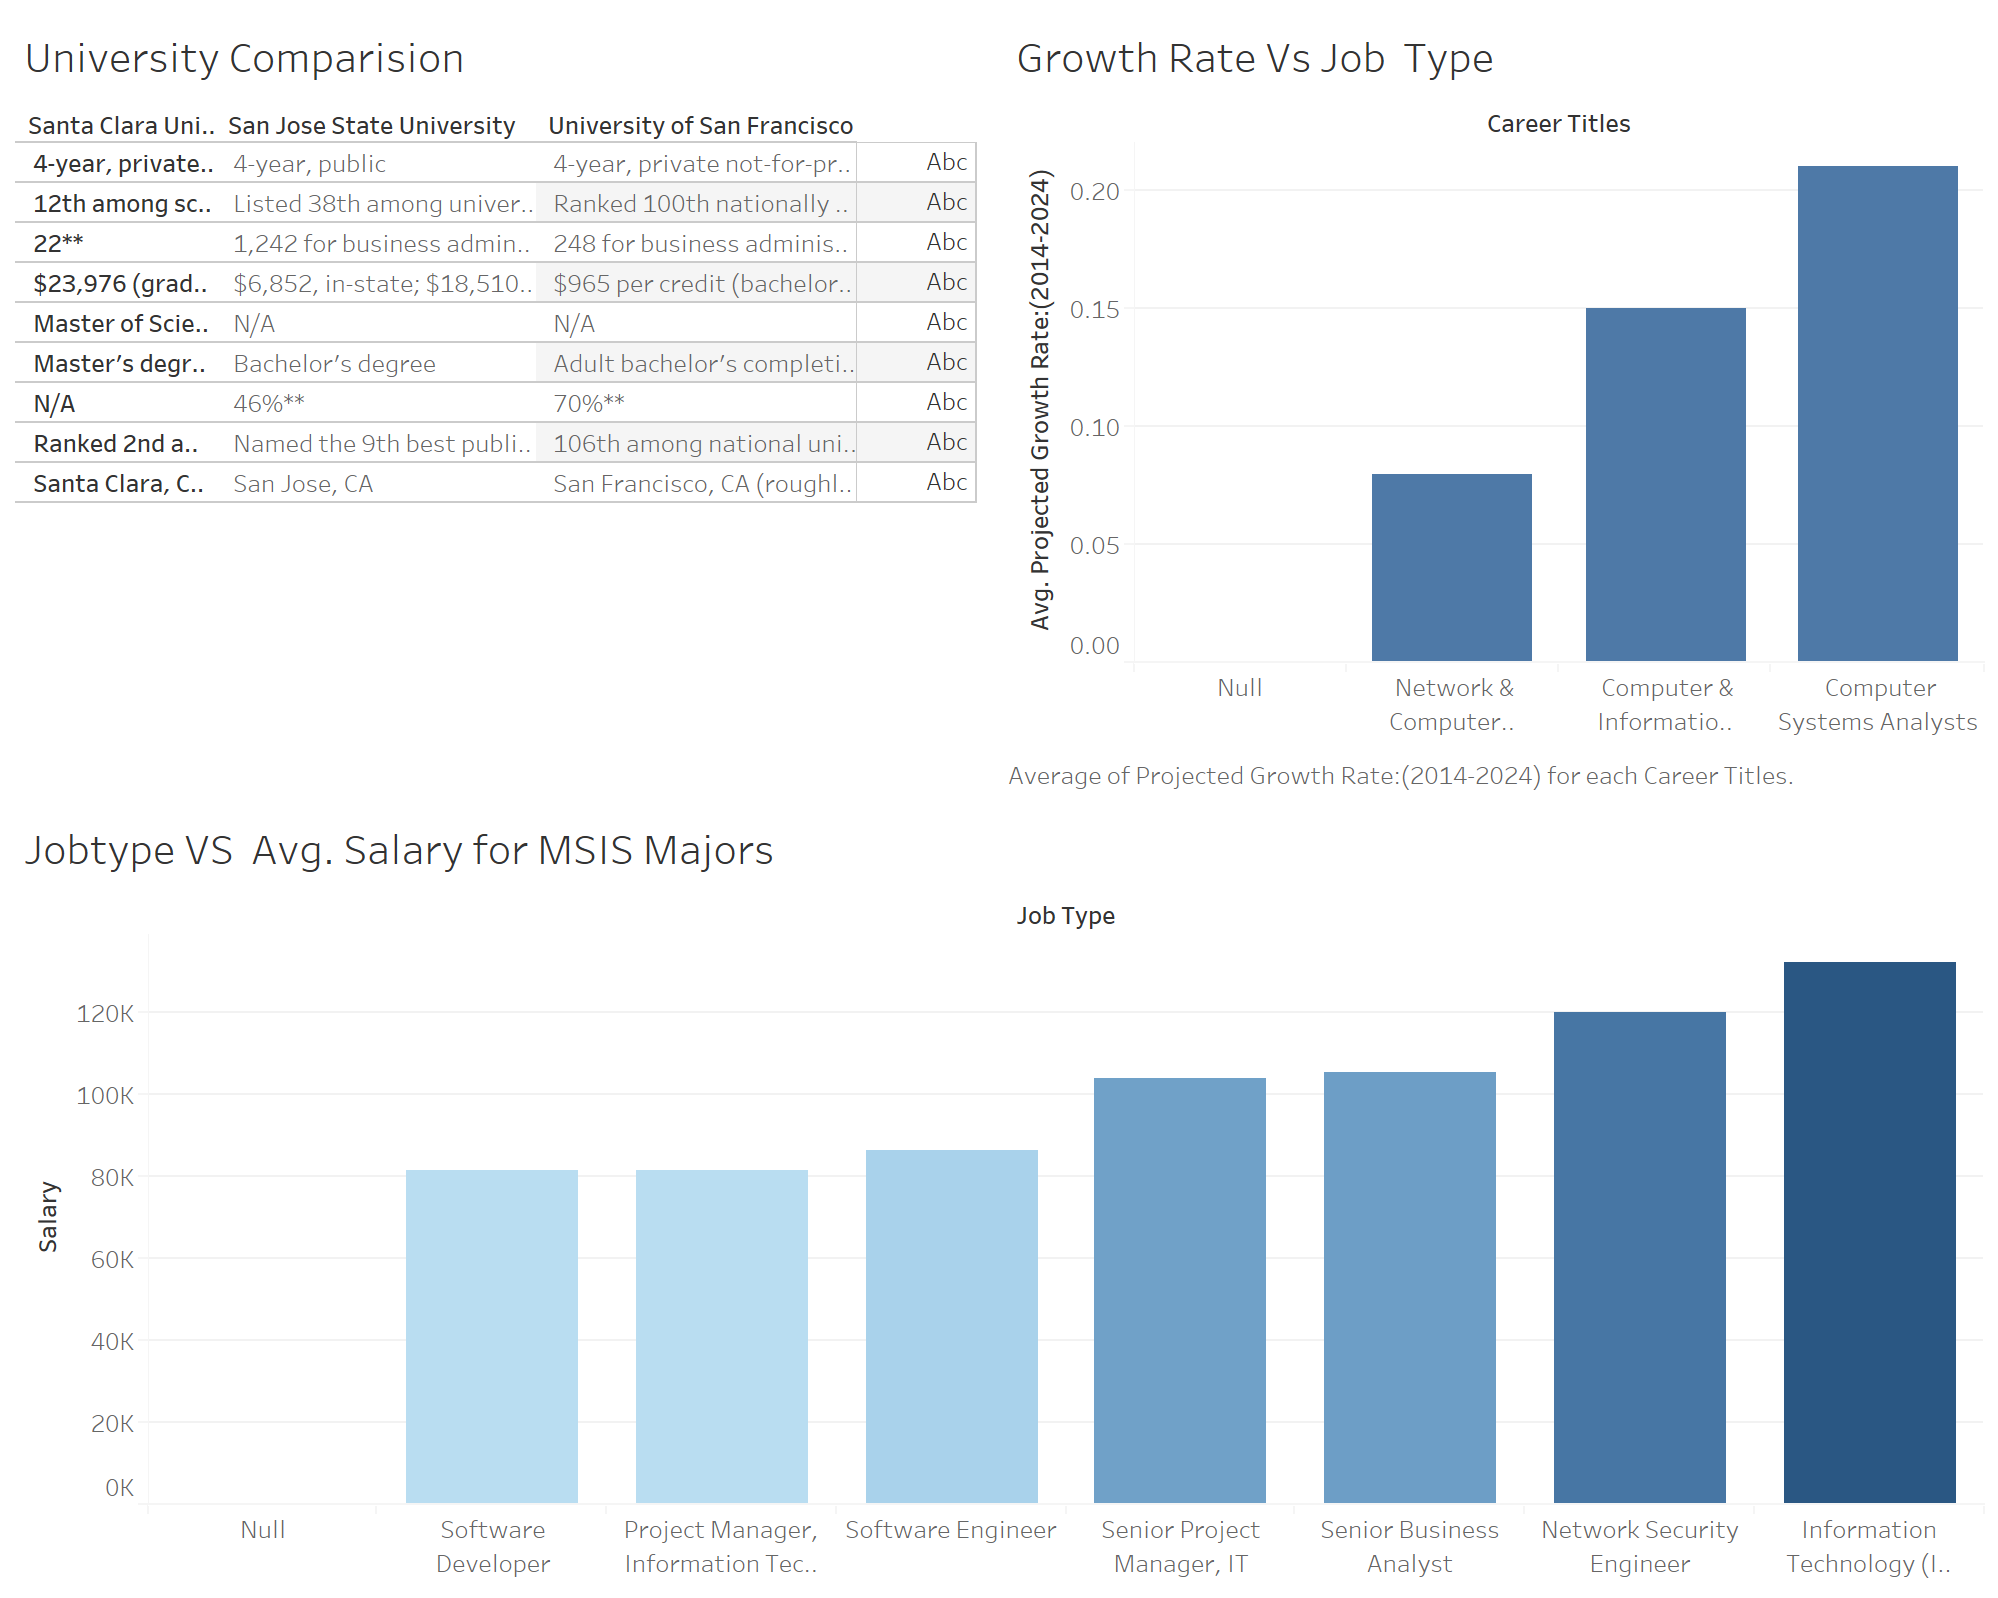

In [100]:
from IPython.display import Image
Image("/Users/rosenrot/Downloads/Dashboard 1.png")

Future Roadmap: Collecting more data for recruiters to showcase that the students of MSIS program at Santa Clara University 
showcase very strong skills that they are looking for and can hire more people from the university. If given enough time 
I would have like to include data from Linkedin to show were are the alumnus placed in the silicon valley, the major comapinies
so that students can get more factual data to select SCU for their Masters.